# Monochrome camera calibration
One of the great disadvantages with using lenses is the distortion it introduces to the image. For vacation images, this is usually not a problem, but when we use the image to describe the physical surroundings it becomes important that the images are representative of the scene it captures. An easy way to get an indication of how distorted an image is by looking at what is supposed to be straight lines since they will appear curved. The following exercises you will be calibrating a camera to obtain a camera matrix such that you can undistort images from this camera.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

## Exercise 1
The process of calibrating an image consists of mainly 3 steps: 1) find chessboard-corners in a dataset of images containing a chessboard. 2) Use the corner points to compute a camera matrix. 3) Use the camera matrix to undistort images.

After setting some optimization parameters we can loop over all the images in the `imgs` folder and extract the checkerboard corners.

Use any of the images in the folder `imgs` to extract the number of checkerboard corners there are on the checkerboard. Fill in the information in `nb_vertical` and `nb_horizontal` and look up the opencv `findChessboardCorners` function and implement it in the below code snippet .

In [2]:

#Implement the number of vertical and horizontal corners
nb_vertical = 6
nb_horizontal = 9


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp_l = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp_l[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints_l = [] # 3d point in real world space
imgpoints_l = [] # 2d points in image plane.

left_rs = glob.glob('rs/left-*.png')
assert left_rs


for fname in left_rs:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    #Implement findChessboardCorners here
    ret, corners = cv2.findChessboardCorners(img, (nb_vertical, nb_horizontal))


    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints_l.append(objp_l)

        imgpoints_l.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

Using the extracted corners we can obtain a camera matrix that contains the information needed to undistort images

In [3]:
ret_l, mtx_l, dist_l, rvecs_l, tvecs_l = cv2.calibrateCamera(objpoints_l, imgpoints_l, gray.shape[::-1], None, None)
img = cv2.imread('rs/left-0000.png')
h,  w = img.shape[:2]
newcameramtx_l, roi_l = cv2.getOptimalNewCameraMatrix(mtx_l,dist_l,(w,h),1,(w,h))

In [4]:
# FOR RIGHT IMAGES ONLY!!!
#Implement the number of vertical and horizontal corners
nb_vertical = 6
nb_horizontal = 9


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp_r = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp_r[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints_r = [] # 3d point in real world space
imgpoints_r = [] # 2d points in image plane.

right_rs = glob.glob('rs/right-*.png')
assert right_rs


for fname in right_rs:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    #Implement findChessboardCorners here
    ret, corners = cv2.findChessboardCorners(img, (nb_vertical, nb_horizontal))


    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints_r.append(objp_r)

        imgpoints_r.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [5]:
# FOR RIGHT IMAGES ONLY!!!
ret_r, mtx_r, dist_r, rvecs_r, tvecs_r = cv2.calibrateCamera(objpoints_r, imgpoints_r, gray.shape[::-1], None, None)
img = cv2.imread('rs/right-0000.png')
h,  w = img.shape[:2]
newcameramtx_r, roi_r = cv2.getOptimalNewCameraMatrix(mtx_r,dist_r,(w,h),1,(w,h))
print(mtx_r)

[[375.12051571   0.         321.7664807 ]
 [  0.         375.43831988 244.06321779]
 [  0.           0.           1.        ]]


The last step is to actually undistort an image:

Text(0.5, 1.0, 'Undistorted image')

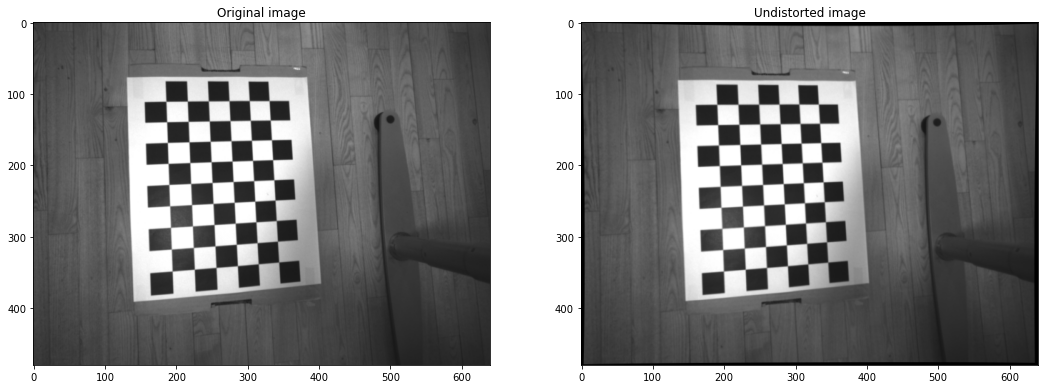

In [15]:
# undistort
img_l = cv2.imread('rs/left-0004.png')
dst_l = cv2.undistort(img_l, mtx_l, dist_l, None, newcameramtx_l)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img_l[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst_l[...,[2,1,0]])
ax[1].set_title('Undistorted image')

Text(0.5, 1.0, 'Undistorted image')

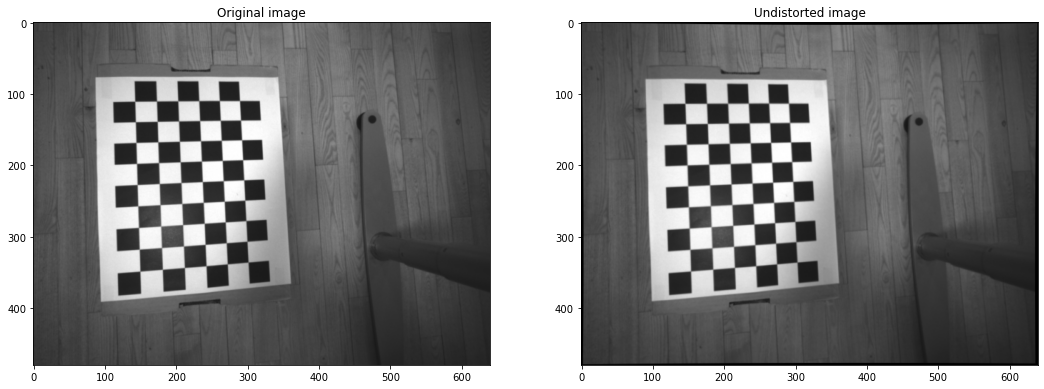

In [16]:
# undistort
img_r = cv2.imread('rs/right-0004.png')
dst_r = cv2.undistort(img_r, mtx_r, dist_r, None, newcameramtx_r)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img_r[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst_r[...,[2,1,0]])
ax[1].set_title('Undistorted image')

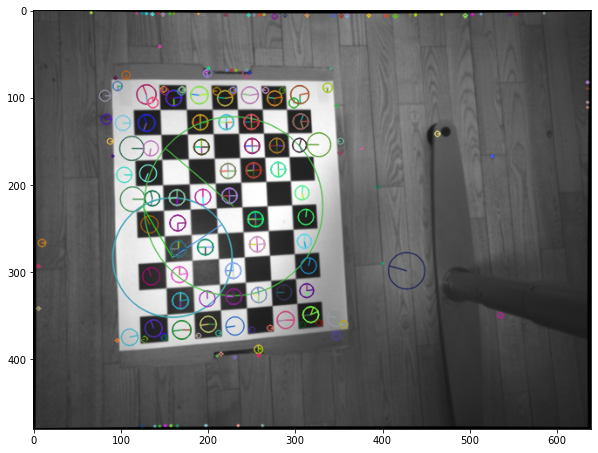

In [17]:
img1 = dst_l
img2 = dst_r

"""
Detect keypoints here
kp1, des1 = ...
kp2, des2 = ...
"""
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

kp_img = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (10,10))
plt.imshow(kp_img)

In [18]:
"""
Implement bf matcher here
matches = ...
"""

# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.match(des1,des2)



# FLANN parameters
#flann = cv2.FlannBasedMatcher()
#matches = flann.knnMatch(des1,des2,k=2)
#matches = [m for m, n in matches]

# Sort them in the order of their distance (i.e. best matches first).
matches = sorted(matches, key = lambda x:x.distance)

In [19]:
nb_matches = 200

good = []
pts1 = []
pts2 = []

for m in matches[:nb_matches]:
    good.append(m)
    pts1.append(kp1[m.queryIdx].pt)
    pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
    

#Implement findFundamentalMat here:
F, mask = cv2.findFundamentalMat(pts1, pts2)

# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In [20]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    print(img1.shape)
    r,c, joe = img1.shape
    #img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    #img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,2)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

In [12]:
print(img1.shape)

(480, 640, 3)


(480, 640, 3)
(480, 640, 3)


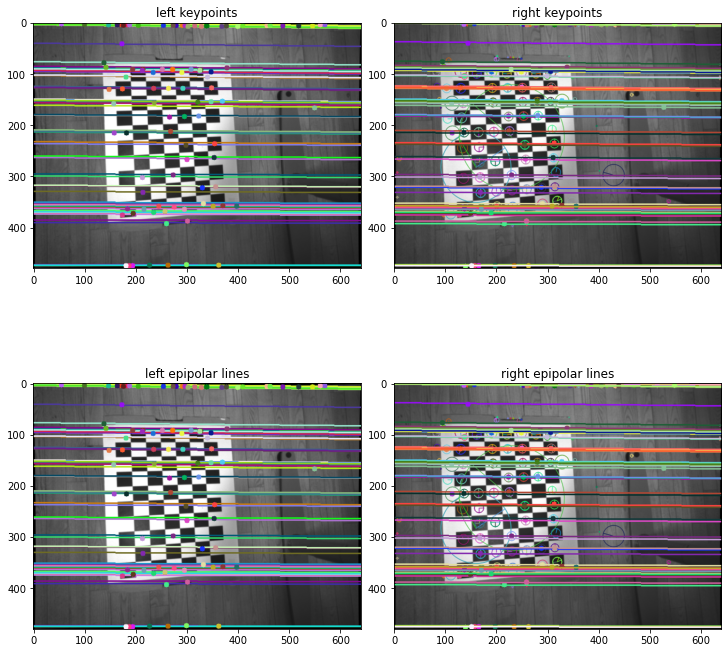

In [21]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2 ,F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10,10))
axs[0, 0].imshow(img4)
axs[0, 0].set_title('left keypoints')
axs[0, 1].imshow(img6)
axs[0, 1].set_title('right keypoints')
axs[1, 0].imshow(img5)
axs[1, 0].set_title('left epipolar lines')
axs[1, 1].imshow(img3)
axs[1, 1].set_title('right epipolar lines')
plt.show()

In [24]:
print(img1.shape)

(480, 640, 3)


In [26]:
flags = cv2.CALIB_FIX_INTRINSIC

T = np.zeros((3, 1), dtype=np.float64)
R = np.eye(3, dtype=np.float64)
cv2.stereoCalibrate(objpoints_l, imgpoints_l, imgpoints_r, 
    mtx_l, dist_l,
    mtx_r, dist_r,
    (480, 640),
    R,                            # R
    T,                            # T
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1, 1e-5),
    flags = flags)

print(T)
print(R)

[[-1.48075912e+00]
 [ 1.45312835e-03]
 [ 1.32212873e-02]]
[[ 9.99998277e-01 -6.33341414e-04  1.74509897e-03]
 [ 6.28820449e-04  9.99996448e-01  2.58999636e-03]
 [-1.74673312e-03 -2.58889454e-03  9.99995123e-01]]


[[ 0.99997292 -0.0015915  -0.00718583]
 [ 0.00160081  0.99999789  0.0012908 ]
 [ 0.00718376 -0.00130227  0.99997335]]


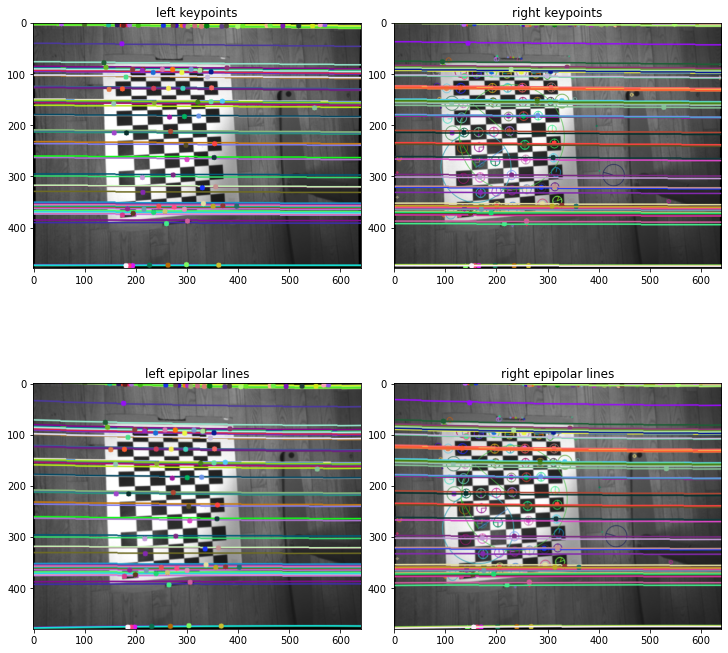

In [37]:
R1, R2, P1, P2, Q, roi1, roi2 = cv2.stereoRectify(mtx_l, dist_l, mtx_r, dist_r, (480, 640), R, T)
print(R1)

map1x, map1y = cv2.initUndistortRectifyMap(
    cameraMatrix=mtx_l,
    distCoeffs=dist_l,
    R=R1,
    newCameraMatrix=P1,
    size=(640, 480),
    m1type=cv2.CV_32FC1)

map2x, map2y = cv2.initUndistortRectifyMap(
    cameraMatrix=mtx_r,
    distCoeffs=dist_r,
    R=R2,
    newCameraMatrix=P2,
    size=(640, 480),
    m1type=cv2.CV_32FC1)

img1_rect = cv2.remap(img1, map1x, map1y, cv2.INTER_LINEAR)
img2_rect = cv2.remap(img2, map2x, map2y, cv2.INTER_LINEAR)

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10,10))
axs[0, 0].imshow(img1)
axs[0, 0].set_title('left keypoints')
axs[0, 1].imshow(img2)
axs[0, 1].set_title('right keypoints')
axs[1, 0].imshow(img1_rect)
axs[1, 0].set_title('left epipolar lines')
axs[1, 1].imshow(img2_rect)
axs[1, 1].set_title('right epipolar lines')
plt.show()

A refining step can be to crop the image such that it doesn't contain the large black areas at the edges of the image.

In [ ]:
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(10,10))
plt.imshow(dst[...,[2,1,0]])